In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dfA = pd.read_csv("wbc.csv")
dfA=dfA.replace('?',np.nan)
dfA['bare_nuclei'] = pd.to_numeric(dfA.bare_nuclei.fillna(dfA.bare_nuclei.median()))

In [3]:
X = dfA.drop([dfA.columns[-1]], axis=1)
y = dfA.jenis.map({2: 0, 4: 1})

In [4]:
RAND_SEED_SPLIT = RAND_SEED_TUNING = 84

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=RAND_SEED_SPLIT)

In [6]:
svc=SVC()

In [7]:
C_range= [2**i for i in [-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15]]
gamma_range= [2**i for i in [-15, -13, -11, -9, -7, -5, -3, -1, 1, 3]]

In [8]:
def cost_breast_cancer(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    FN = CM[1][0]
    FP = CM[0][1]
    costBC=((-1*((228.35*FP)+(2850000*FN))))
    return costBC

In [9]:
def specificity(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    nilai=(TN/(FP+TN))
    return nilai

In [10]:
def output_score(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity=(TN/(FP+TN))
    sensitivity=(TP/(TP+FN))
    accuracy=((TP+TN)/(TP+FP+TN+FN))
    costBC=((-1*((228.35*FP)+(2850000*FN))))
    return (specificity, sensitivity, accuracy, costBC)

In [11]:
my_custom_scorer=make_scorer(cost_breast_cancer, greater_is_better=True)
score_specificity=make_scorer(specificity, greater_is_better=True)
output_scoring=make_scorer(output_score, greater_is_better=True)

In [11]:
print(__doc__)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': gamma_range,
                     'C': C_range},]

scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf2 = GridSearchCV(svc, tuned_parameters, cv=10,
                       scoring=my_custom_scorer)
    clf2.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf2.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf2.cv_results_['mean_test_score']
    stds = clf2.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf2.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer)

Best parameters set found on development set:

{'gamma': 0.125, 'kernel': 'rbf', 'C': 0.5}

Grid scores on development set:

-47329487.179 (+/-2784178.556) for {'gamma': 3.0517578125e-05, 'kernel': 'rbf', 'C': 0.03125}
-47329487.179 (+/-2784178.556) for {'gamma': 0.0001220703125, 'kernel': 'rbf', 'C': 0.03125}
-44771794.872 (+/-4444027.676) for {'gamma': 0.00048828125, 'kernel': 'rbf', 'C': 0.03125}
-5164239.672 (+/-6631463.620) for {'gamma': 0.001953125, 'kernel': 'rbf', 'C': 0.03125}
-1717536.042 (+/-2789393.112) for {'gamma': 0.0078125, 'kernel': 'rbf', 'C': 0.03125}
-852976.889 (+/-2610192.197) for {'gamma': 0.03125, 'kernel': 'rbf', 'C': 0.03125}
-641.137 (+/-860.823) for {'gamma': 0.125, 'kernel': 'rbf', 'C': 0.03125}
-47329487.179 (+/-2784178.556) for {'gamma': 0.5, 'kernel': 'rbf', 'C': 0.03125}
-47329487.179 (+/-2784178.556) for {'gamma': 2, 'kernel':

In [12]:
print("Best score cost obtained: {0}".format(clf2.best_score_))
print("Parameters:")
for key, value in clf2.best_params_.items():
    print("\t{}: {}".format(key, value))

Best score cost obtained: -595.2713675213676
Parameters:
	gamma: 0.125
	kernel: rbf
	C: 0.5


In [13]:
clf2.best_estimator_

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
bestSVC=SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
bestSVC.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
scores1=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring=score_specificity)

In [17]:
print("Score cost: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))

Score cost: 0.9139 (+/- 0.1163)


In [18]:
scores2=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring=my_custom_scorer)

In [19]:
print("Score cost: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))

Score cost: -593.7100 (+/- 796.2837)


In [20]:
scores3=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring='recall')

In [21]:
print("Score cost: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))

Score cost: 1.0000 (+/- 0.0000)


In [22]:
scores4=cross_val_score(bestSVC,X_train,y_train,cv=10,scoring='accuracy')

In [23]:
print("Score cost: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Score cost: 0.9446 (+/- 0.0743)


In [14]:
y_predSVM = bestSVC.predict(X_test)
accuracy = accuracy_score(y_test, y_predSVM)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predSVM)
print(classification_report(y_test, y_predSVM))
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))
output_score(y_test, y_predSVM)

             precision    recall  f1-score   support

          0       0.99      0.94      0.96       156
          1       0.88      0.99      0.93        75

avg / total       0.96      0.95      0.95       231

Akurasi: 0.9524
Precision: 0.8810
Recall: 0.9867
F1: 0.9308


(0.9358974358974359, 0.98666666666666669, 0.95238095238095233, -2852283.5)

In [15]:
confusion_matrix(y_test, y_predSVM)

array([[146,  10],
       [  1,  74]])

In [15]:
y_predSVM = bestSVC.predict(X_test)
accuracy = accuracy_score(y_test, y_predSVM)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predSVM)
print(classification_report(y_test, y_predSVM))
print (('Akurasi: %.4f') % (accuracy))
print (('Precision: %.4f') % (precision[1]))
print (('Recall: %.4f') % (recall[1]))
print (('F1: %.4f') % (f1[1]))
output_score(y_test, y_predSVM)

             precision    recall  f1-score   support

          0       0.99      0.94      0.96       156
          1       0.88      0.99      0.93        75

avg / total       0.96      0.95      0.95       231

Akurasi: 0.9524
Precision: 0.8810
Recall: 0.9867
F1: 0.9308


(0.9358974358974359, 0.98666666666666669, 0.95238095238095233, -2852283.5)

In [16]:
from xgboost import XGBClassifier

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
from sklearn.cross_validation import StratifiedKFold

In [19]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True, random_state=RAND_SEED_SPLIT)

In [20]:
classifier = XGBClassifier()

In [31]:
print(__doc__)

# Set the parameters by cross-validation
tuned_parameters ={'n_estimators': [10,20,30,50],
                    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.],
                    'reg_alpha': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'reg_lambda': [0., 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5., 10.],
                    'scale_pos_weight': np.linspace(1., (y_train == 2).sum() / y_train.sum(), 10)
                   }    

                  
params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}
scores = [my_custom_scorer]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(estimator=XGBClassifier(**params_fixed, seed=RAND_SEED_TUNING),
    param_distributions=tuned_parameters, cv=cv, scoring=my_custom_scorer)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for make_scorer(cost_breast_cancer)

Best parameters set found on development set:

{'n_estimators': 10, 'reg_lambda': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.5, 'scale_pos_weight': 1.0, 'reg_alpha': 0.001}

Grid scores on development set:

-1711445.323 (+/-3784255.368) for {'n_estimators': 10, 'reg_lambda': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.5, 'scale_pos_weight': 1.0, 'reg_alpha': 0.001}
-1991528.639 (+/-4444425.729) for {'n_estimators': 20, 'reg_lambda': 1.0, 'subsample': 0.5, 'colsample_bytree': 0.5, 'scale_pos_weight': 0.66666666666666674, 'reg_alpha': 5.0}
-7697549.585 (+/-8096019.022) for {'n_estimators': 30, 'reg_lambda': 0.0, 'subsample': 0.8, 'colsample_bytree': 0.6, 'scale_pos_weight': 0.11111111111111116, 'reg_alpha': 0.005}
-2277746.587 (+/-3426531.765) for {'n_estimators': 50, 'reg_lambda': 0.001, 'subsample': 0.7, 'colsample_bytree': 0.8, 'scale_pos_weight': 1.0, '

In [32]:
print("Best score cost obtained: {0}".format(clf.best_score_))
print("Parameters:")
for key, value in clf.best_params_.items():
    print("\t{}: {}".format(key, value))

Best score cost obtained: -1711445.3228632482
Parameters:
	n_estimators: 10
	reg_lambda: 0.01
	subsample: 0.7
	colsample_bytree: 0.5
	scale_pos_weight: 1.0
	reg_alpha: 0.001


In [33]:
clf.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.001, reg_lambda=0.01,
       scale_pos_weight=1.0, seed=84, silent=1, subsample=0.7)

In [21]:
bestXGB=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.001, reg_lambda=0.01,
       scale_pos_weight=1.0, seed=84, silent=1, subsample=0.7)

In [22]:
bestXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.5,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='binary:logistic', reg_alpha=0.001, reg_lambda=0.01,
       scale_pos_weight=1.0, seed=84, silent=1, subsample=0.7)

In [36]:
scores1=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring=score_specificity)
print("Specificity: %0.4f (+/- %0.4f)" % (scores1.mean(), scores1.std() * 2))
scores2=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() * 2))
scores3=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring='recall')
print("Recall: %0.4f (+/- %0.4f)" % (scores3.mean(), scores3.std() * 2))
scores4=cross_val_score(bestXGB,X_train,y_train,cv=cv,scoring=my_custom_scorer)
print("Score cost: %0.4f (+/- %0.4f)" % (scores4.mean(), scores4.std() * 2))

Specificity: 0.9668 (+/- 0.0422)
Accuracy: 0.9657 (+/- 0.0393)
Recall: 0.9640 (+/- 0.0790)
Score cost: -1710228.3500 (+/- 3780952.2720)


In [23]:
y_predXGB = bestXGB.predict(X_test)
accuracy = accuracy_score(y_test, y_predXGB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predXGB)
print(classification_report(y_test, y_predXGB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predXGB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predXGB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       156
          1       0.93      0.95      0.94        75

avg / total       0.96      0.96      0.96       231

Akurasi: 0.9610
Specificity: 0.9679
Recall: 0.9467


(0.96794871794871795, 0.94666666666666666, 0.96103896103896103, -11401141.75)

In [24]:
confusion_matrix(y_test, y_predXGB)

array([[151,   5],
       [  4,  71]])

In [24]:
y_predXGB = bestXGB.predict(X_test)
accuracy = accuracy_score(y_test, y_predXGB)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_predXGB)
print(classification_report(y_test, y_predXGB))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_test, y_predXGB)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_test, y_predXGB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       156
          1       0.93      0.95      0.94        75

avg / total       0.96      0.96      0.96       231

Akurasi: 0.9610
Specificity: 0.9679
Recall: 0.9467


(0.96794871794871795, 0.94666666666666666, 0.96103896103896103, -11401141.75)

In [25]:
import numpy as np
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import optimizers

Using Theano backend.


In [26]:
def create_model8():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=9, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(10, activation='relu'))
    model8.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model8.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model8

In [27]:
from sklearn.model_selection import train_test_split
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X, y,test_size=0.33, random_state=seed )

In [28]:
from keras.models import load_model

In [29]:
model=create_model8()

In [30]:
best_class_weight = {0: 1.0, 1: 8}

In [31]:
bestNN = KerasClassifier(build_fn=create_model8, epochs= 20, class_weight = best_class_weight, verbose=0)

In [32]:
bestNN.fit(X_trainb.as_matrix(), y_trainb)

In [33]:
y_predNN = bestNN.predict(X_testb.as_matrix())
accuracy = accuracy_score(y_testb, y_predNN)
precision, recall, f1, _ = precision_recall_fscore_support(y_testb, y_predNN)
print(classification_report(y_testb, y_predNN))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_testb, y_predNN)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_testb, y_predNN)

             precision    recall  f1-score   support

          0       0.99      0.93      0.96       152
          1       0.89      0.99      0.93        79

avg / total       0.96      0.95      0.95       231

Akurasi: 0.9524
Specificity: 0.9342
Recall: 0.9873


(0.93421052631578949, 0.98734177215189878, 0.95238095238095233, -2852283.5)

In [35]:
confusion_matrix(y_testb,y_predNN)

array([[142,  10],
       [  1,  78]])

In [28]:
y_predNN = bestNN.predict(X_testb.as_matrix())
accuracy = accuracy_score(y_testb, y_predNN)
precision, recall, f1, _ = precision_recall_fscore_support(y_testb, y_predNN)
print(classification_report(y_testb, y_predNN))
print (('Akurasi: %.4f') % (accuracy))
print (('Specificity: %.4f') % (specificity(y_testb, y_predNN)))
print (('Recall: %.4f') % (recall[1]))
output_score(y_testb, y_predNN)

             precision    recall  f1-score   support

          0       0.99      0.93      0.96       152
          1       0.89      0.99      0.93        79

avg / total       0.96      0.95      0.95       231

Akurasi: 0.9524
Specificity: 0.9342
Recall: 0.9873


(0.93421052631578949, 0.98734177215189878, 0.95238095238095233, -2852283.5)

In [29]:
names=['SVM - Dataset A','XGBoost - Dataset A','MLP - Dataset A']

In [30]:
score=bestSVC.predict_proba(X_test)
score2=bestXGB.predict_proba(X_test)
score3=bestNN.predict_proba(X_testb.as_matrix())

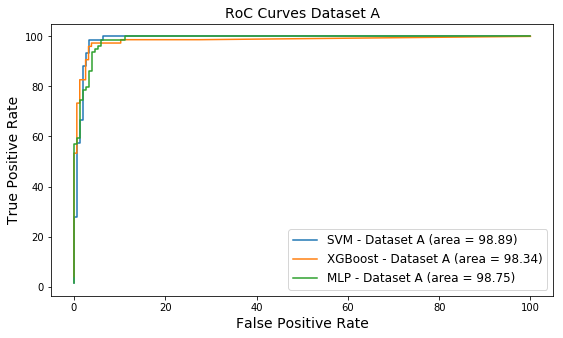

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots(figsize=(9,5))

fpr, tpr, thresholds = roc_curve(y_test, score[:,1],pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, score2[:,1],pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_testb, score3[:,1],pos_label=1)

auc = roc_auc_score(y_test, score[:,1])
auc2 = roc_auc_score(y_test, score2[:,1])
auc3 = roc_auc_score(y_testb, score3[:,1])

ax.plot(fpr*100, tpr*100, label='%s (area = %.2f)' % (names[0], auc*100))
ax.plot(fpr2*100, tpr2*100, label='%s (area = %.2f)' % (names[1], auc2*100))
ax.plot(fpr3*100, tpr3*100, label='%s (area = %.2f)' % (names[2], auc3*100))

plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.title("RoC Curves Dataset A",fontsize=14)
plt.legend(prop={'size':12})
ax.set_xlabel('False Positive Rate',fontsize=14)
ax.set_ylabel('True Positive Rate',fontsize=14)
plt.show()